<a href="https://colab.research.google.com/github/TharaThankachan/Assignment_1_Sep/blob/main/Thara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import essential libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [ ]:
# Load the data set

In [2]:
df=pd.read_csv('/content/titanic_dataset (3).csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Check number of rows and columns

In [3]:
df.shape

(891, 12)

In [ ]:
# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [ ]:
# Cabin has comparatively less data, instead of filling that null values we can ignore it

In [7]:
df.drop('Cabin',axis=1,inplace=True)

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Fill the null values of Age column

In [9]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [10]:
df['Age'].mean()

29.69911764705882

In [11]:
df['Age'].median()

28.0

In [ ]:
# Fill the Age column with median value


In [12]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [ ]:
# Fill the null values of Embarked  column       

In [13]:
df['Embarked'].dtype

dtype('O')

In [ ]:
# Embarked  column contains 'object' type data       

In [14]:
df['Embarked'].mode()

0    S
dtype: object

In [ ]:
# Fill the null values of 'Embarked column using mode 

In [15]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [16]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


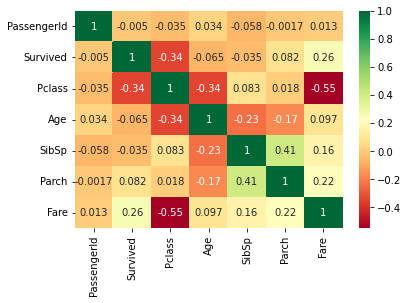

In [18]:
cm=df.corr()
sns.heatmap(cm, annot=True,cmap="RdYlGn",cbar=True)
plt.show()

In [ ]:
# drop unwanted columns

In [19]:
df.drop(['Ticket','Name'],axis=1,inplace=True)

In [20]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [ ]:
 # Encode the categorical columns

In [ ]:
#Label encoding

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le=LabelEncoder()

In [23]:
df['Sex']=le.fit_transform(df['Sex'])

In [24]:
df['Embarked']=le.fit_transform(df['Embarked'])

In [25]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [ ]:
# Set target and features for test and train

In [26]:
y=df['Survived']
X=df.drop('Survived',axis=1)

In [ ]:
# Splitting the data for testing and training using 'Train test split'

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [ ]:
# KNN model creation

In [ ]:
#Import libraries

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.metrics import accuracy_score,recall_score,precision_score
from sklearn.metrics import classification_report

In [79]:

kNN_m=[]
neighbors=range(3,15)
for k in neighbors:
  knn_clf=KNeighborsClassifier(n_neighbors=k)
  knn_clf=knn_clf.fit(X_train,y_train)
  knn_y_predict=knn_clf.predict(X_test)
  acc=accuracy_score(y_test,knn_y_predict)
  kNN_m.append(acc)

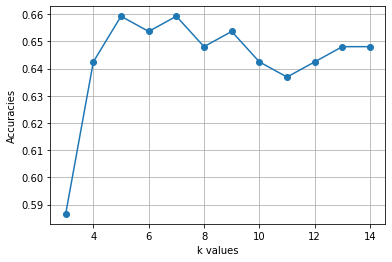

In [80]:
plt.plot(neighbors,kNN_m,'o-')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid()

In [81]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf =knn_clf.fit(X_train,y_train)
y_pred_kNN = knn_clf.predict(X_test)

In [82]:
score_knn=knn_clf.score(X_test,y_test)
score_knn

0.659217877094972

In [47]:
accuracy_score(y_test,y_pred_kNN)

0.659217877094972

In [43]:
print(classification_report(y_test,y_pred_kNN))

              precision    recall  f1-score   support

           0       0.66      0.97      0.78       105
           1       0.88      0.28      0.43        74

    accuracy                           0.69       179
   macro avg       0.77      0.63      0.61       179
weighted avg       0.75      0.69      0.64       179



In [ ]:
# Support Vector Machine(SVM) Model creation

In [ ]:
#import libraries

In [48]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score

In [49]:
svm_clf=SVC(kernel='linear')
svm_clf=svm_clf.fit(X_train,y_train)
svm_y_predict=svm_clf.predict(X_test)

In [50]:
confusion_matrix(y_test,svm_y_predict)

array([[88, 17],
       [23, 51]])

In [51]:
accuracy_score(y_test,svm_y_predict)

0.776536312849162

In [52]:
print(classification_report(y_test,svm_y_predict))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       105
           1       0.75      0.69      0.72        74

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179



In [ ]:
# RBF Radial basis function

In [53]:
svm_clf_rbf=SVC(kernel='rbf')

In [54]:
svm_clf_rbf=svm_clf_rbf.fit(X_train,y_train)
rbf_y_predict=svm_clf_rbf.predict(X_test)


In [55]:
confusion_matrix(y_test,rbf_y_predict)

array([[103,   2],
       [ 70,   4]])

In [56]:
accuracy_score(y_test,rbf_y_predict)

0.5977653631284916

In [57]:
print(classification_report(y_test,rbf_y_predict))

              precision    recall  f1-score   support

           0       0.60      0.98      0.74       105
           1       0.67      0.05      0.10        74

    accuracy                           0.60       179
   macro avg       0.63      0.52      0.42       179
weighted avg       0.62      0.60      0.48       179



In [ ]:
# Here SVM-linear kernel has a better performance ,so this can be used for further reference

In [ ]:
# Cross validation 

In [ ]:
# 1) k fold cross validation for KNN model

In [ ]:
# import libraries

In [89]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [90]:
kfold_validator=KFold(10)

In [ ]:
for train_index, test_index in kfold_validator.split(X,y): 
 print('Training Index:',train_index)
 print('Test index is',test_index)

In [92]:
knn_cv_result=cross_val_score(knn_clf,X,y,cv=kfold_validator)
knn_cv_result

array([0.56666667, 0.53932584, 0.49438202, 0.57303371, 0.48314607,
       0.56179775, 0.71910112, 0.71910112, 0.68539326, 0.68539326])

In [93]:
np.mean(knn_cv_result)

0.6027340823970038

In [ ]:
#2)  k fold cross validation for SVM model

In [99]:
svm_cv_result=cross_val_score(svm_clf,X,y,cv=kfold_validator)
svm_cv_result

array([0.8       , 0.80898876, 0.76404494, 0.84269663, 0.76404494,
       0.80898876, 0.76404494, 0.73033708, 0.87640449, 0.7752809 ])

In [100]:
np.mean(svm_cv_result)

0.7934831460674158

In [ ]:
# 1) Stratified K-Fold cross validation for KNN model

In [ ]:
# import library for stratified KFold

In [94]:
from sklearn.model_selection import StratifiedKFold

In [95]:
skfold_validator=StratifiedKFold(n_splits=10)

In [ ]:
for train_index, test_index in skfold_validator.split(X,y): 
 print('Training Index:',train_index)
 print('Test index is',test_index)

In [108]:
knn_skcv_result=cross_val_score(knn_clf,X,y,cv=skfold_validator)
knn_skcv_result

array([0.45555556, 0.61797753, 0.42696629, 0.4494382 , 0.4494382 ,
       0.49438202, 0.46067416, 0.47191011, 0.53932584, 0.66292135])

In [ ]:
# knn score value

In [105]:
np.mean(knn_skcv_result)

0.5028589263420724

In [ ]:
# 2) Stratified K-Fold cross validation for SVM model

In [106]:
svm_skcv_result=cross_val_score(svm_clf,X,y,cv=skfold_validator)
svm_skcv_result

array([0.8       , 0.79775281, 0.7752809 , 0.84269663, 0.78651685,
       0.78651685, 0.78651685, 0.74157303, 0.84269663, 0.7752809 ])

In [107]:
np.mean(svm_skcv_result)

0.7934831460674159

In [ ]:
# conclusion:  k-fold cross validation and stratified k fold cross validation of SVM model have a better performance compare to KNN model